In [1]:
import pandas as pd

import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import seaborn as sns
sns.set(style="whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df=pd.read_csv(r'sms_senior.csv', encoding= 'unicode_escape')
df.head()

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


In [27]:
BagOfWords=(df[df.columns[1:-4].tolist()]).copy()
BagOfWords.head()

,got,great,wat,free,text,txt,win,already,dun,say,...,sleep,care,mins,phone,number,wish,leave,thing,many,wan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


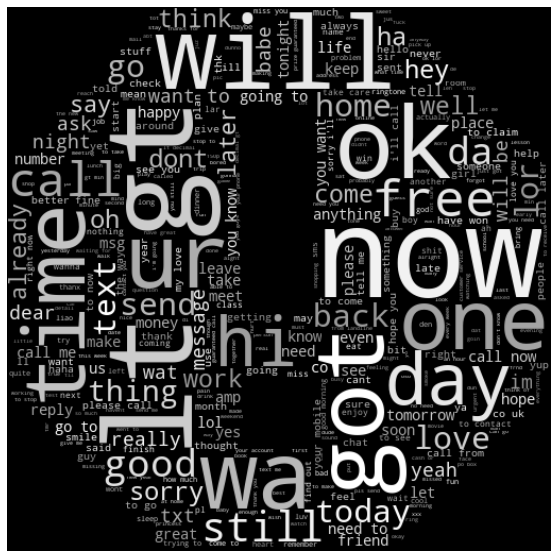

In [23]:
import random

wordstring = df[df.columns[0]].str.cat(sep=' ')
wordstring

text = wordstring.lower()

wine_mask = np.array(Image.open(r'spam_icon.png'))
wine_mask

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


def transform_format(val):
#     print (val)
    if (val == 0):
        return 255
    else:
        return val

# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
#     print(wine_mask[i])
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

# Check the expected result of your mask
transformed_wine_mask

# Create a word cloud image
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_wine_mask, contour_width=1, contour_color='black')

# Generate a wordcloud
wc.generate(text)

# store to file
#wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
default_colors = wc.to_array()
# plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
# plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

,Month,IsSpam,Date
0,February,no,1512
1,February,yes,244
2,January,no,1687
3,January,yes,266
4,March,no,1628
5,March,yes,237


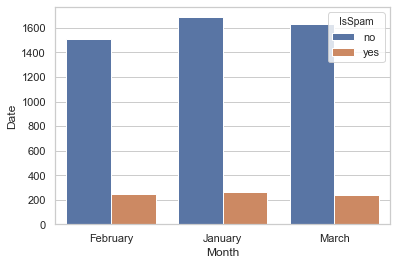

In [6]:
#2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;
# df['Date'].month
df['Month']=pd.DatetimeIndex(df['Date']).month_name()
df_2=df[['Date', 'Month', 'IsSpam']]
# df_2

df_3=df_2.groupby(['Month', 'IsSpam']).count().reset_index()
display(df_3)

# sns.lineplot(x="Month", y="Date", hue="IsSpam",
#                   data=df_3)

ax = sns.barplot(x="Month", y="Date", hue="IsSpam",
                  data=df_3)

In [7]:
#3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês;

df_temp=df[['Word_Count', 'Date']].copy()
df_temp['Month']=pd.DatetimeIndex(df['Date']).month_name()


for month in df_temp['Month'].unique().tolist():
    print(month)
    display(df_temp[df_temp['Month']==month].describe())
    print('Variância: ',np.var(df_temp[df_temp['Month']==month]['Word_Count']),'\n')

January


,Word_Count
count,1953.000000
mean,16.336918
std,12.557171
min,2.000000
25%,8.000000
50%,13.000000
75%,24.000000
max,190.000000


Variância:  157.6017963357536 

February


,Word_Count
count,1756.000000
mean,16.029043
std,11.042459
min,2.000000
25%,8.000000
50%,13.000000
75%,23.000000
max,100.000000


Variância:  121.86646856076912 

March


,Word_Count
count,1865.000000
mean,16.285255
std,11.576213
min,2.000000
25%,8.000000
50%,12.000000
75%,24.000000
max,115.000000


Variância:  133.936860323872 



In [8]:
#4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).
df['Day']=pd.DatetimeIndex(df['Date']).day
df_2=df[df['IsSpam']=='no'][['Date', 'Day','Month', 'IsSpam']]
df_3=df_2.groupby(['Day','Month']).count().reset_index().sort_values(by=('Month'))

for month in df_3['Month'].unique().tolist():
    display(df_3[df_3['Month']==month].sort_values(by='Date',ascending=False).iloc[0])
#     display(df_3[df_3['Month']==month].max())

Day             13
Month     February
Date            72
IsSpam          72
Name: 36, dtype: object

Day             1
Month     January
Date           69
IsSpam         69
Name: 1, dtype: object

Day           8
Month     March
Date         69
IsSpam       69
Name: 23, dtype: object

In [21]:
##SEGUNDA ETAPA

#aplicar um método capaz de classificar automaticamente as mensagens como “comum” e “spam”. 
#Como você considera os resultados encontrados? Justifique.


# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer()
# X = matrix.fit_transform(BagOfWords).toarray()
X=BagOfWords.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['IsSpam'], test_size=0.25, random_state=2)



from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
# print(predicted)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9634146341463414
